_Fashion-MNIST veri kümesini kullanarak:_
- _Veri setini yükleyin ve verileri normalleştirmek gibi ön işlemlerinizi yapın. UMAP'ı verilere uygulayın._
- _İki boyutlu UMAP gösterimini kullanarak, derste yaptığımız gibi veri noktalarını renklendirip etiketleyerek verilerin grafiğini çizin._
- _UMAP çözümünün tatmin edici olduğunu düşünüyor musunuz? Farklı sınıfları kolayca ayırt edebiliyor musunuz? Hangisi daha iyi bir iş çıkardı: UMAP mi? yoksa (t-SNE veya PCA)mi?_
- _Şimdi, UMAP'in farklı hiperparametre değerleri ile oynayın ve her biri için UMAP uygulayın. İki boyutlu gösterim netliği açısından hangi kombinasyon en iyisidir?_

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import umap

In [4]:
mnist = fetch_openml('Fashion-MNIST', version = 1, cache = True)

In [6]:
np.random.seed(42)

idx = np.random.choice(70000,10000)
x = mnist.data[idx]
y = mnist.target[idx].astype(np.int64)

x_std = StandardScaler().fit_transform(x)

Wall time: 14.8 s
Wall time: 28.6 s


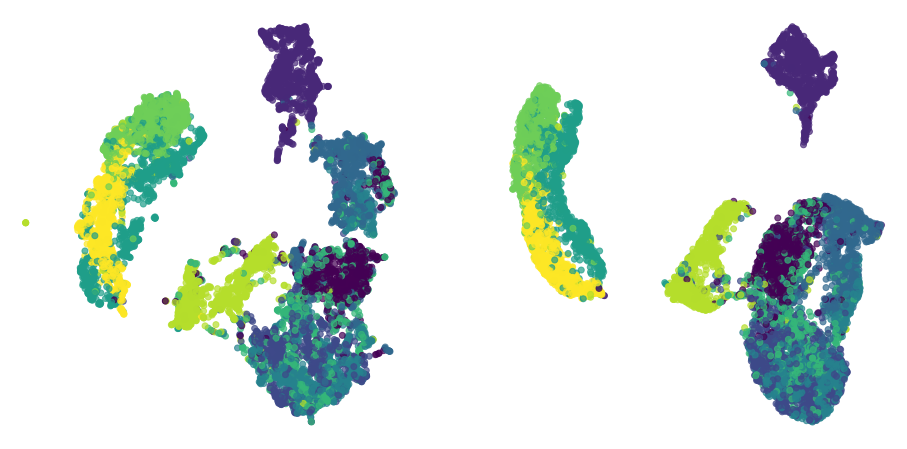

In [12]:
plt.figure(figsize=(16,8))
for num, k in enumerate([5,20], 1):
    %time x_umap = umap.UMAP(n_neighbors=k, min_dist=0.3, metric='correlation').fit_transform(x_std)
    plt.subplot(1, 2, num)
    plt.scatter(x_umap[:, 0], x_umap[:, 1], alpha = 0.7, c = y)
    plt.axis('off')

Wall time: 13.9 s
Wall time: 14.5 s


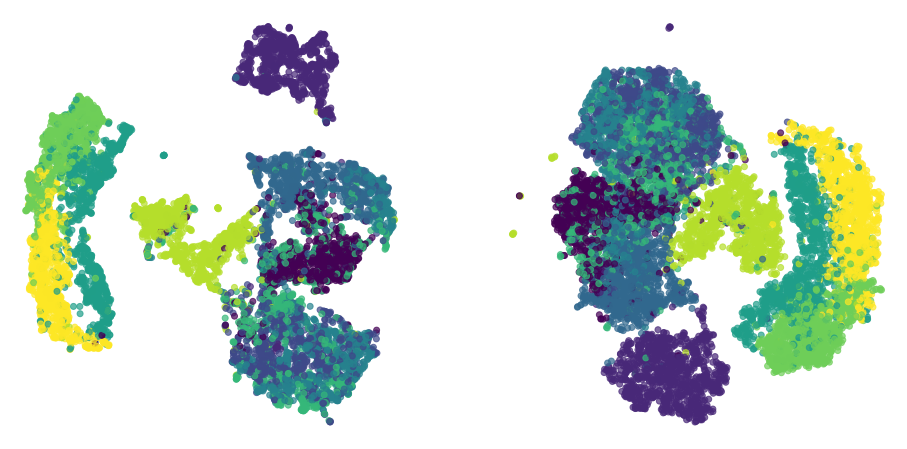

In [13]:
plt.figure(figsize=(16,8))
for num, k in enumerate([0.3,0.8], 1):
    %time x_umap = umap.UMAP(n_neighbors=5, min_dist=k, metric='correlation').fit_transform(x_std)
    plt.subplot(1, 2, num)
    plt.scatter(x_umap[:, 0], x_umap[:, 1], alpha = 0.7, c = y)
    plt.axis('off')

> UMAP, boyut azaltma yöntemleri arasında en iyi performası sergilemektedir. PCA ve t-SNE yöntemine göre daha keskin kümelenmeler oluşturmuştur. Kullanılan parametreler arasından nNeighbors=5 ve minDist=0.8 en iyi sonucu verdi. Hız olarak, t-SNE göre 10 kat iyi sonuçlar elde edildi.